In [403]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from pathlib import Path


In [404]:
def infection(S, I, N, iterations, I_comp, S_comp, beta):    
    for i in range(iterations):
        S, I = S - beta * ((S * I) / N), I + beta * ((S * I) / N)
        S_comp.append(S)
        I_comp.append(I)

In [405]:
def SI_mse_calc(N,contamine):
    mse = 1000000000000
    iterations = len(contamine)
    betarange = np.linspace(0,100,101)
    for pas in betarange:
        S = N - 1
        I = 1
        S_comp = [] # infected compartment
        I_comp = [] # susceptible compartment
        beta = pas/100
        infection(S, I, N, iterations, I_comp, S_comp, beta)
        newmsi = np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean()
        if(newmsi < mse):
            mse = newmsi
            betavalue = beta
    return [mse,betavalue]

## Densité population 1/2

### 5000 individus

In [406]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur2/population5000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur2/population5000"

In [407]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0   514  3097454        0      0  3097969
   Init   Run  Mesures  Close  Total
0   254  9012        0      0   9267


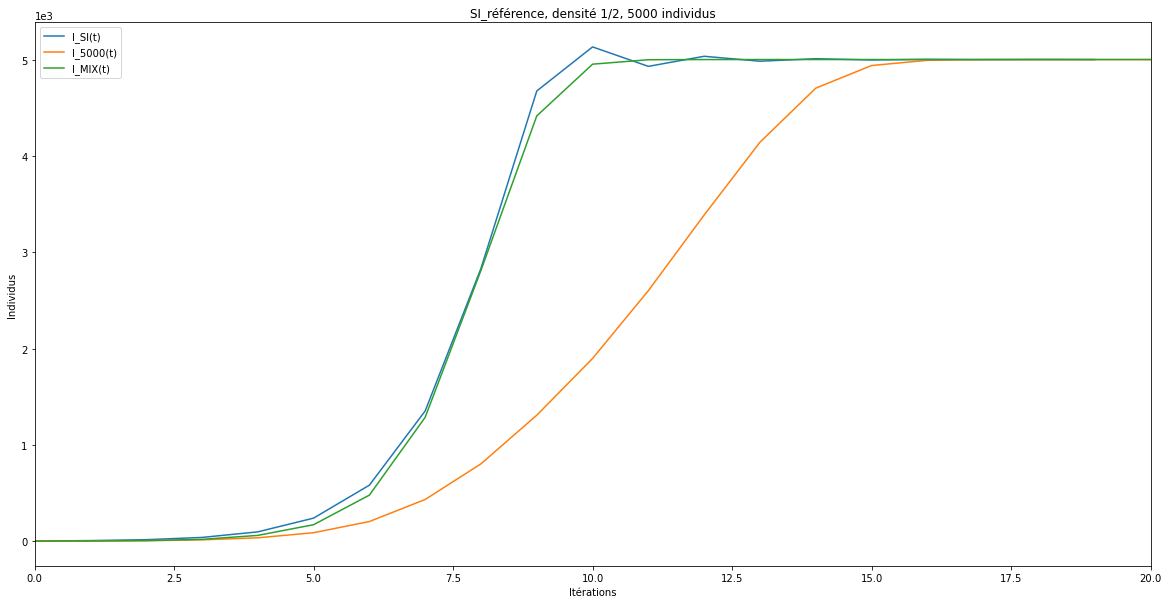

In [408]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 5000 # S + I = N
beta = 1.5
iterations = 20

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/2, 5000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [409]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  6927.88839506782  pour un paramètre beta =  0.97
MSE minimal (I_MIX,I_SI) :  235460.64787727044  pour un paramètre beta =  1.0
MSE (I_5000,I_MIX) :  220077.77333333335


### 20000 individus

In [410]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur2/population20000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur2/population20000"

In [411]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0    60  7890347        2      1  7890411
   Init    Run  Mesures  Close  Total
0   139  33361        9     20  33532


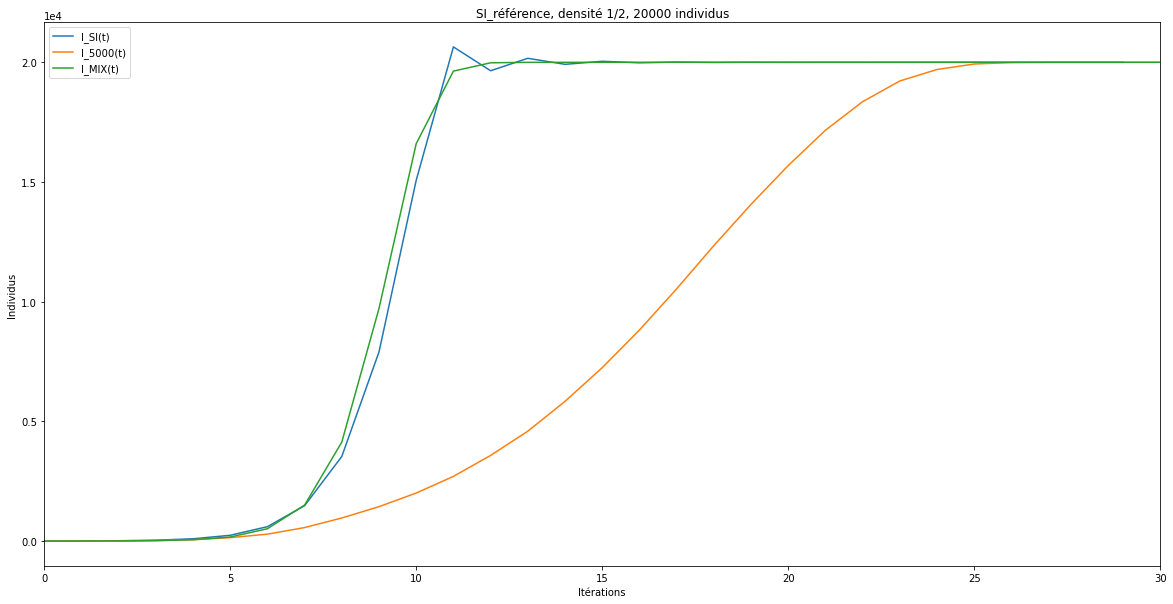

In [412]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 20000 # S + I = N
beta = 1.5
iterations = 30

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/2, 20000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [413]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  478996.3302636574  pour un paramètre beta =  0.7
MSE minimal (I_MIX,I_SI) :  5523472.789352637  pour un paramètre beta =  1.0
MSE (I_5000,I_MIX) :  11915271.606666667


### 50000 individus

In [414]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur2/population50000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur2/population50000"

In [415]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0   274  14263929       10      2  14264216
   Init    Run  Mesures  Close  Total
0   383  80615       61      3  81062


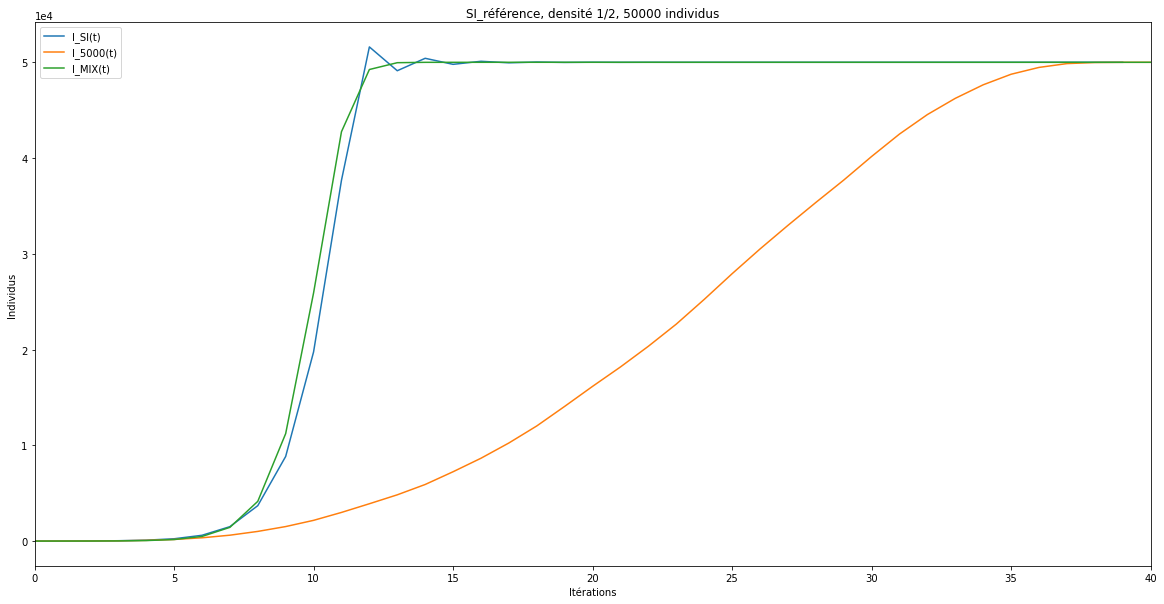

In [416]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 50000 # S + I = N
beta = 1.5
iterations = 40

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_mix, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/2, 50000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [417]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  7806822.943926442  pour un paramètre beta =  0.52
MSE minimal (I_MIX,I_SI) :  40665106.45998628  pour un paramètre beta =  1.0
MSE (I_5000,I_MIX) :  148414464.82


### 100000 individus

In [418]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur2/population100000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur2/population100000"

In [419]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0   533  20234258       10      5  20234808
   Init     Run  Mesures  Close   Total
0   139  156331       81     29  156582


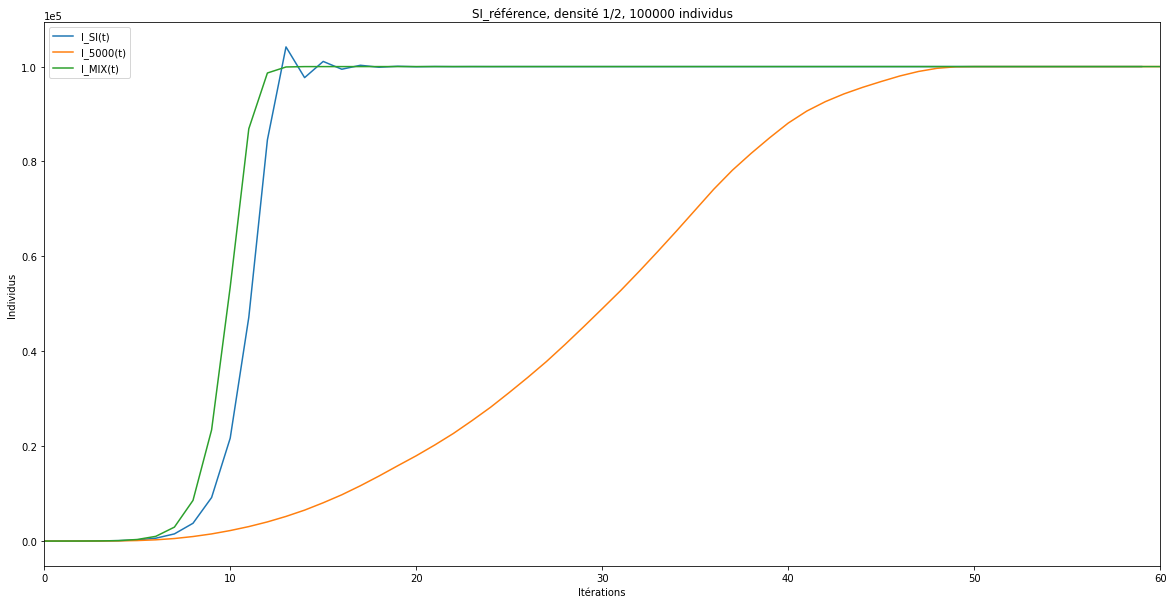

In [420]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 100000 # S + I = N
beta = 1.5
iterations = 60

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/2, 100000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [421]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  43396620.11018591  pour un paramètre beta =  0.43
MSE minimal (I_MIX,I_SI) :  227994265.28348276  pour un paramètre beta =  1.0
MSE (I_5000,I_MIX) :  915036026.9866667


## Densité population 1/4

### 5000 individus

In [422]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur4/population5000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur4/population5000"

In [423]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0   147  3451199        0      0  3451347
   Init   Run  Mesures  Close  Total
0   231  9266        0      0   9499


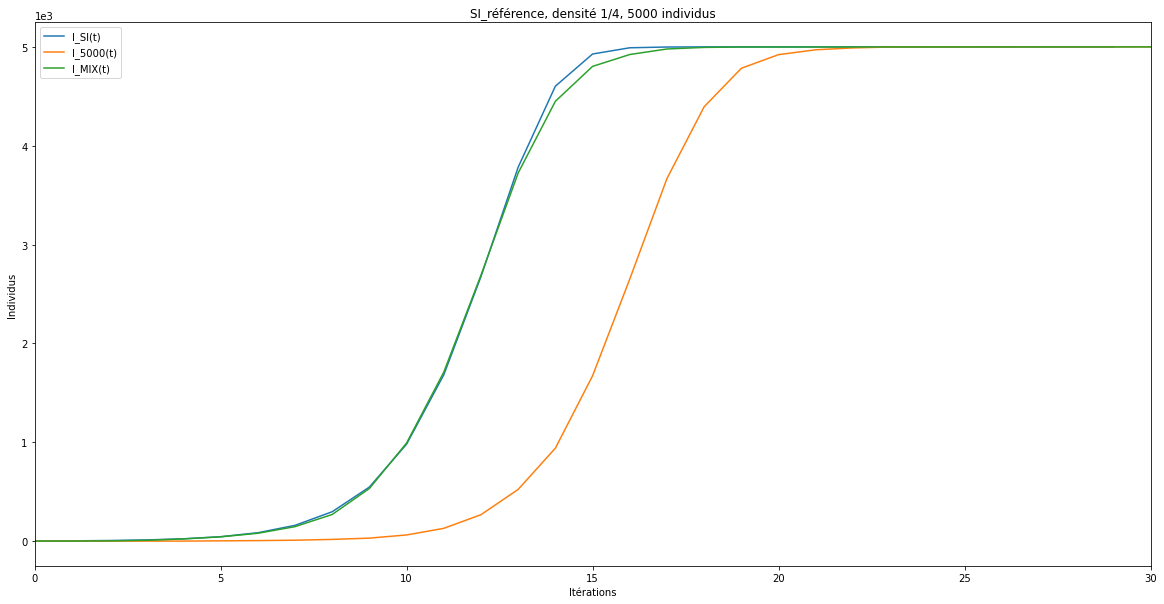

In [424]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 5000 # S + I = N
beta = 0.89
iterations = 30

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/4, 5000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [425]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  4276.335293307601  pour un paramètre beta =  0.63
MSE minimal (I_MIX,I_SI) :  332.3486550526147  pour un paramètre beta =  0.89
MSE (I_5000,I_MIX) :  328114.8933333333


### 20000 individus

In [426]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur4/population20000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur4/population20000"

In [427]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0    30  8875997        2      1  8876032
   Init    Run  Mesures  Close  Total
0   273  32915        2     33  33223


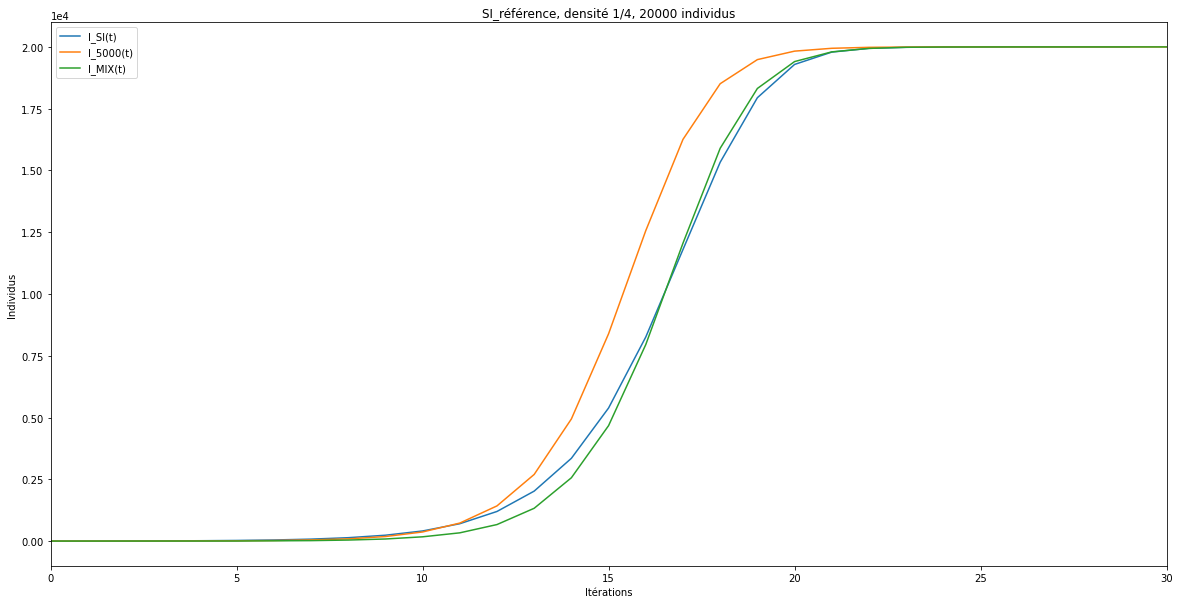

In [428]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 20000 # S + I = N
beta = 0.73
iterations = 30

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/4, 20000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [429]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  6513.525723180276  pour un paramètre beta =  0.79
MSE minimal (I_MIX,I_SI) :  18365.44342010971  pour un paramètre beta =  0.73
MSE (I_5000,I_MIX) :  462919.0733333333


### 50000 individus

In [430]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur4/population50000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur4/population50000"

In [431]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0   171  15888279        5     10  15888467
   Init    Run  Mesures  Close  Total
0   349  79032       37     34  79454


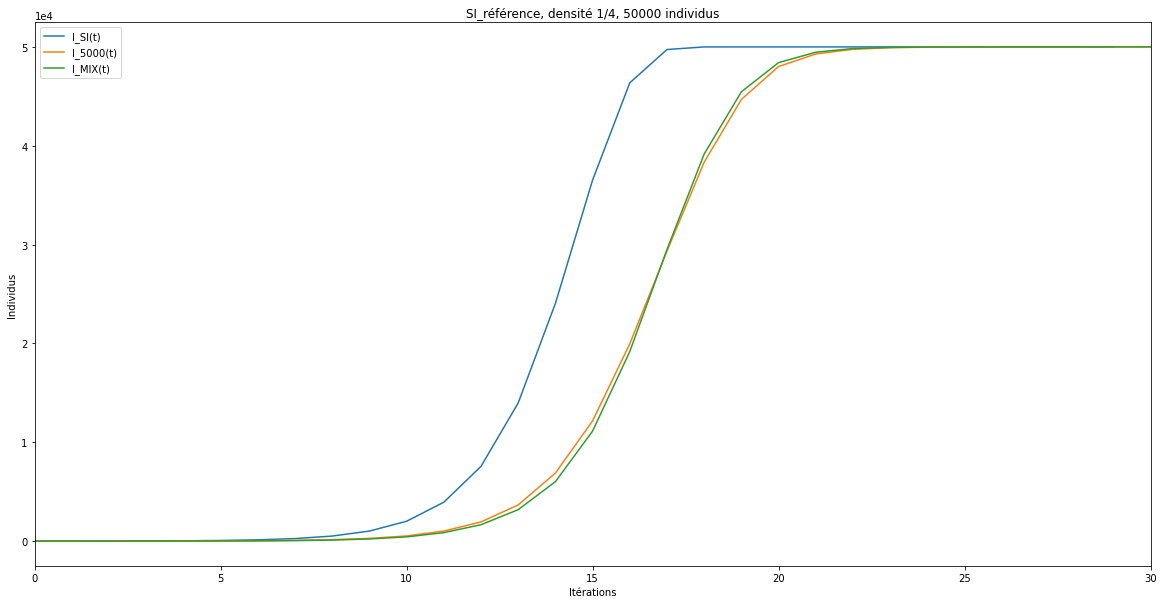

In [432]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 50000 # S + I = N
beta = 1
iterations = 30

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/4, 50000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [433]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  34173.578349111376  pour un paramètre beta =  0.81
MSE minimal (I_MIX,I_SI) :  33709.583500544686  pour un paramètre beta =  0.81
MSE (I_5000,I_MIX) :  28506.986666666668


### 100000 individus

In [434]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur4/population100000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur4/population100000"

In [435]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0  1073  22243765       10      5  22244855
   Init     Run  Mesures  Close   Total
0  1036  152661       74     29  153802


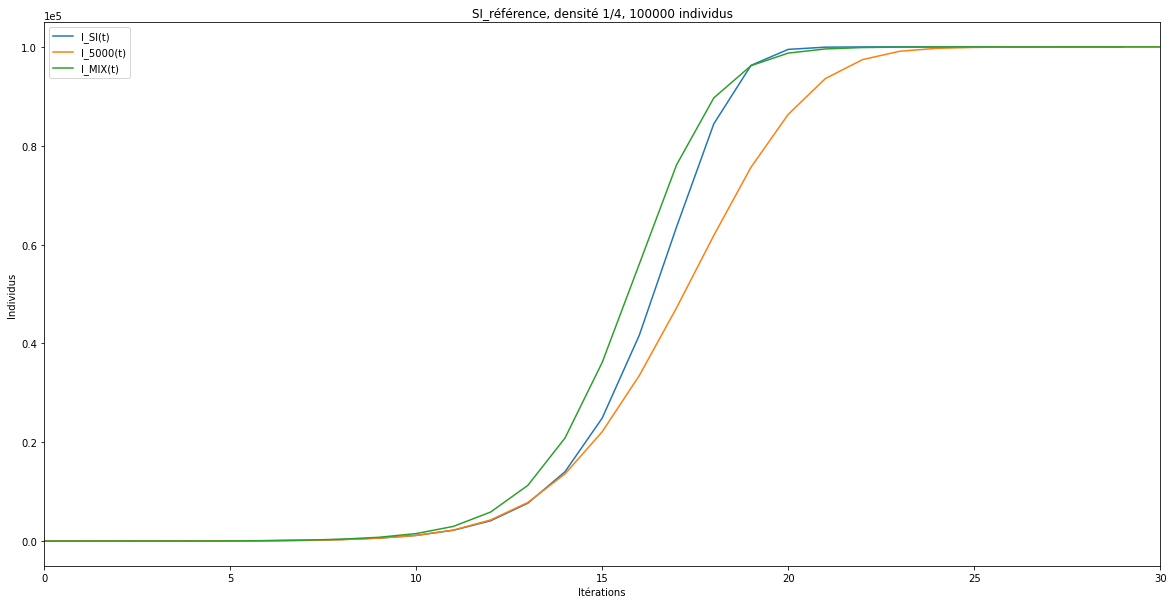

In [436]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 100000 # S + I = N
beta = 0.9
iterations = 30

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/4, 100000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [437]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  2053117.8405182464  pour un paramètre beta =  0.84
MSE minimal (I_MIX,I_SI) :  334054.93523083813  pour un paramètre beta =  0.94
MSE (I_5000,I_MIX) :  20026996.313333333


## Densité population 1/8

### 5000 individus

In [438]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur8/population5000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur8/population5000"

In [439]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0   262  3598706        0      0  3598970
   Init   Run  Mesures  Close  Total
0     2  9505        0      0   9509


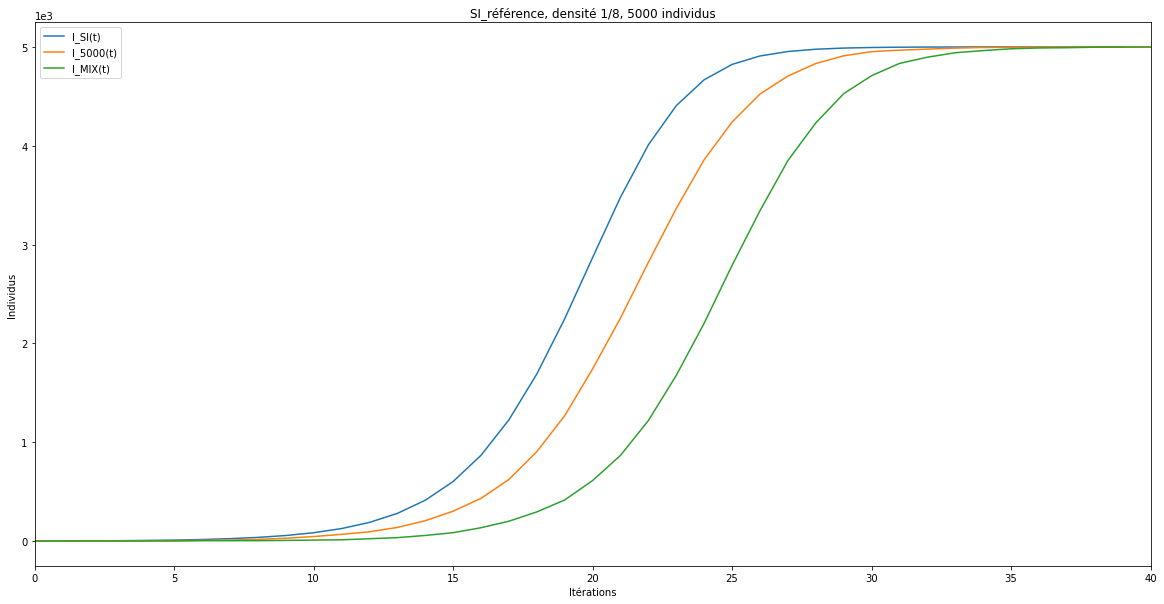

In [440]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 5000 # S + I = N
beta = 0.5
iterations = 40

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/8, 5000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [441]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  465.58987683378064  pour un paramètre beta =  0.45
MSE minimal (I_MIX,I_SI) :  3576.8014108978027  pour un paramètre beta =  0.39
MSE (I_5000,I_MIX) :  117531.16


### 20000 individus

In [442]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur8/population20000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur8/population20000"

In [443]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0    26  9105671        2     17  9105717
   Init    Run  Mesures  Close  Total
0   401  33762        2     70  34237


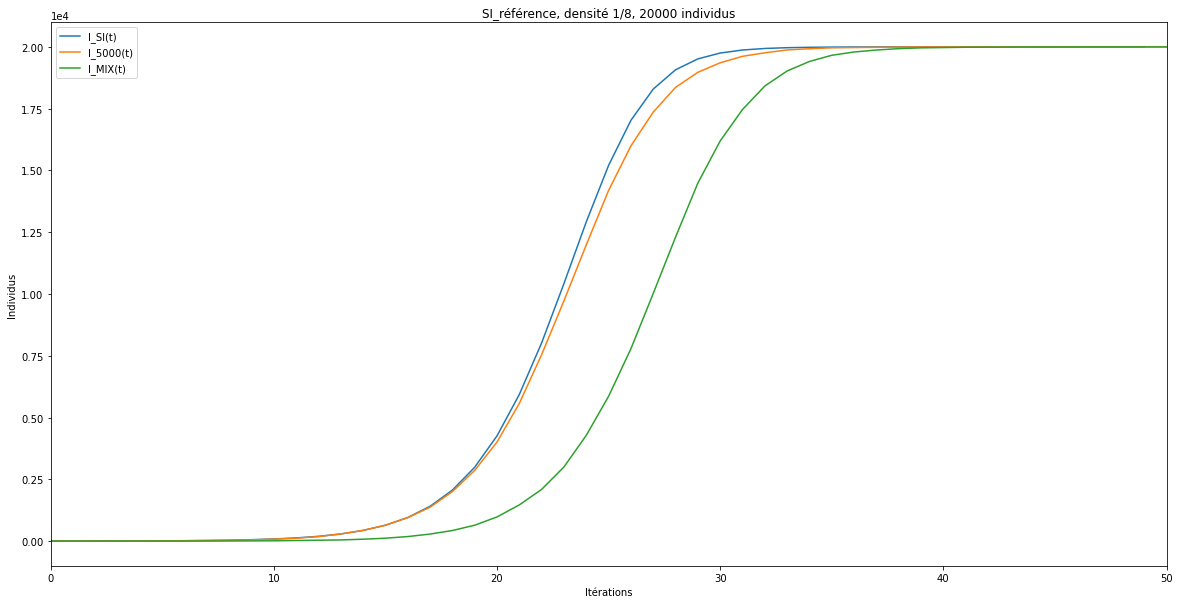

In [444]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 20000 # S + I = N
beta = 0.5
iterations = 50

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/8, 20000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [445]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  7221.606816760491  pour un paramètre beta =  0.49
MSE minimal (I_MIX,I_SI) :  24603.67475456321  pour un paramètre beta =  0.41
MSE (I_5000,I_MIX) :  2900954.526666667


### 50000 individus

In [446]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur8/population50000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur8/population50000"

In [447]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0   265  16283455        5      3  16283729
   Init    Run  Mesures  Close  Total
0    25  77706       12     57  77800


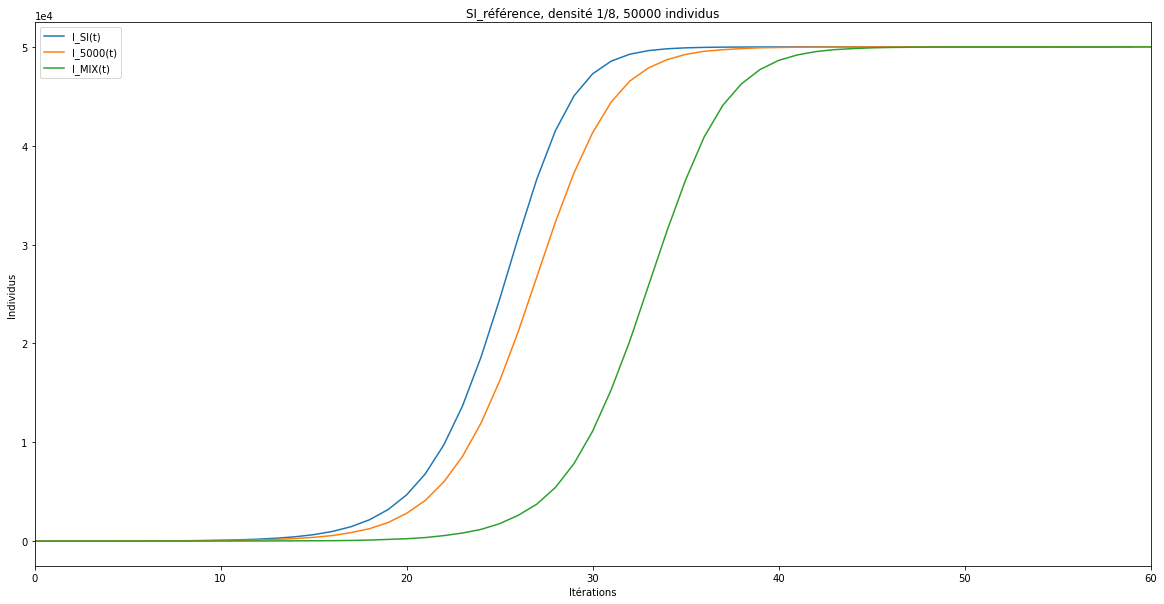

In [448]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 50000 # S + I = N
beta = 0.5
iterations = 60

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/8, 50000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [449]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  84587.94480283059  pour un paramètre beta =  0.46
MSE minimal (I_MIX,I_SI) :  406294.89849408425  pour un paramètre beta =  0.37
MSE (I_5000,I_MIX) :  42831086.346666664


### 100000 individus

In [450]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur8/population100000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur8/population100000"

In [451]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0  1101  22626375       10      5  22627494
   Init     Run  Mesures  Close   Total
0   232  148419      100     46  148798


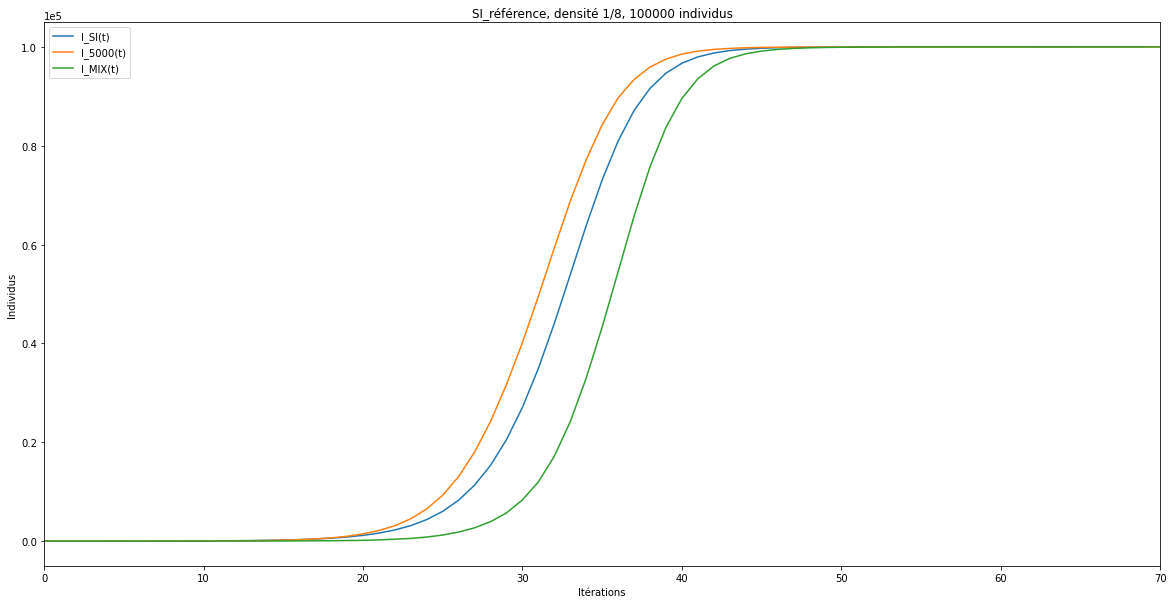

In [452]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 100000 # S + I = N
beta = 0.4
iterations = 70

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/8, 100000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [453]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  198751.80910965853  pour un paramètre beta =  0.42
MSE minimal (I_MIX,I_SI) :  2260890.801454494  pour un paramètre beta =  0.36
MSE (I_5000,I_MIX) :  94191250.03333333


## Densité population 1/16

### 5000 individus

In [454]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur16/population5000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur16/population5000"

In [455]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0     8  3559667        0      0  3559677
   Init   Run  Mesures  Close  Total
0   236  8229        0      0   8466


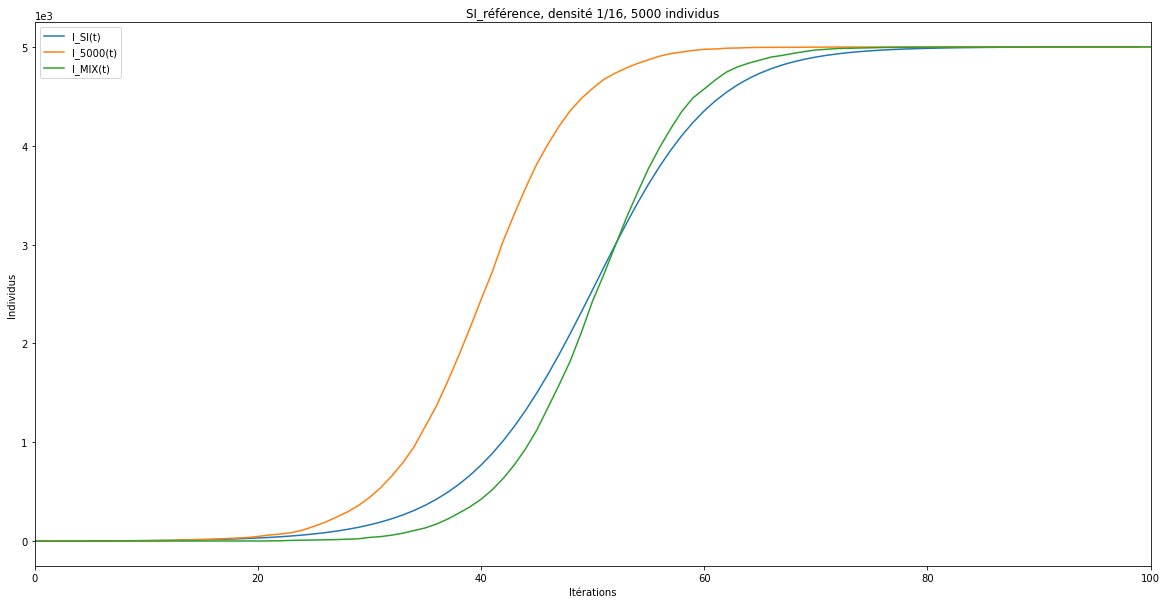

In [456]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 5000 # S + I = N
beta = 0.18
iterations = 100

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/16, 5000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [457]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]


print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  3811.2764194078254  pour un paramètre beta =  0.23
MSE minimal (I_MIX,I_SI) :  15096.460429324778  pour un paramètre beta =  0.18
MSE (I_5000,I_MIX) :  620739.04


### 20000 individus

In [458]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur16/population20000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur16/population20000"

In [459]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0   348  8830792        2      1  8831144
   Init    Run  Mesures  Close  Total
0   235  32784        1      1  33023


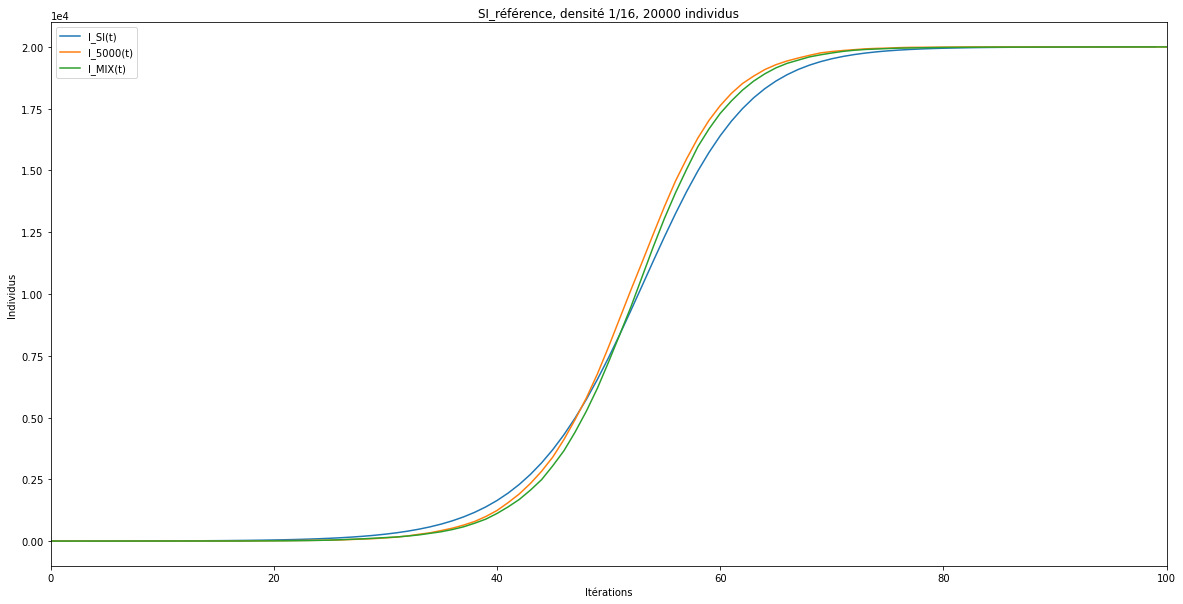

In [460]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 20000 # S + I = N
beta = 0.2
iterations = 100

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/16, 20000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [461]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  134882.46480086868  pour un paramètre beta =  0.2
MSE minimal (I_MIX,I_SI) :  85199.23250366823  pour un paramètre beta =  0.2
MSE (I_5000,I_MIX) :  31212.773333333334


### 50000 individus

In [462]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur16/population50000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur16/population50000"

In [463]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0   426  15663478        5     19  15663928
   Init    Run  Mesures  Close  Total
0   810  78325       33     31  79200


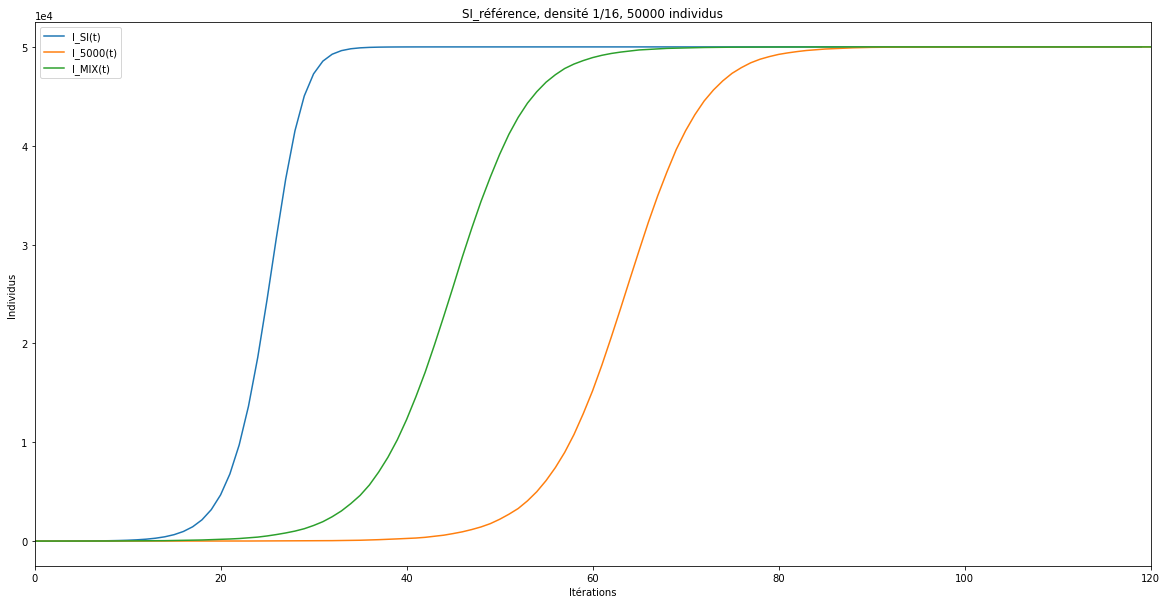

In [464]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 50000 # S + I = N
beta = 0.5
iterations = 120

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/16, 50000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [465]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  1396106.628901564  pour un paramètre beta =  0.18
MSE minimal (I_MIX,I_SI) :  175932.06195338804  pour un paramètre beta =  0.26
MSE (I_5000,I_MIX) :  180289533.30666667


### 100000 individus

In [466]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/5000mouvements/densite1sur16/population100000"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SI/Reference/perfect_mix/densite1sur16/population100000"

In [467]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init       Run  Mesures  Close     Total
0   766  22273807       10      6  22274590
   Init     Run  Mesures  Close   Total
0  1341  147704       71     41  149159


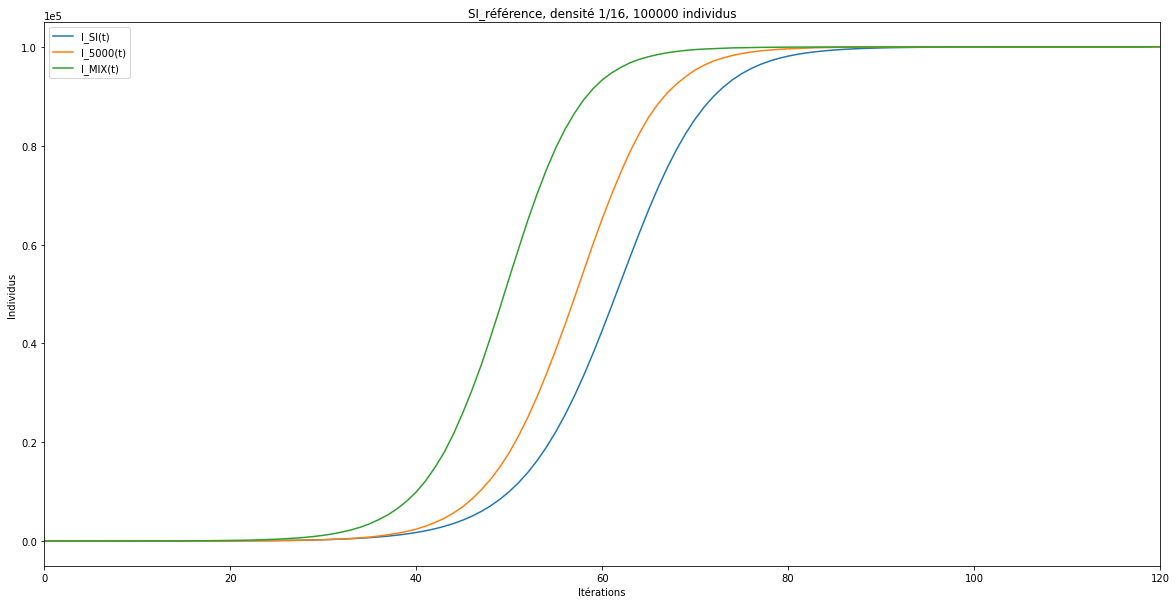

In [468]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)

N = 100000 # S + I = N
beta = 0.2
iterations = 120

S = N - 1
I = 1

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment

infection(S, I, N, iterations, I_comp, S_comp, beta)
figure = plt.figure(figsize=(20, 10))

I_SI, = plt.plot(I_comp, label='I_SI(t)')
I_5000, = plt.plot(contamine1, label='I_5000(t)')
I_MIX, = plt.plot(contamine2, label='I_MIX(t)')

plt.title("SI_référence, densité 1/16, 100000 individus")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_SI, I_5000, I_MIX])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.xlim([0, iterations])
plt.show()

### MSE

In [469]:
print("MSE minimal (I_5000,I_SI) : ", SI_mse_calc(N,contamine1)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine1)[1])
print("MSE minimal (I_MIX,I_SI) : ", SI_mse_calc(N,contamine2)[0], " pour un paramètre beta = ", SI_mse_calc(N,contamine2)[1])

# Adapt length
if(len(contamine1) < len(contamine2)):
    contamine2 = contamine2[:len(contamine1)]
else:
    contamine1 = contamine1[:len(contamine2)]

print("MSE (I_5000,I_MIX) : ", np.square(np.subtract(contamine1['Nombre de contaminés'].values.tolist(),contamine2['Nombre de contaminés'].values.tolist())).mean())

MSE minimal (I_5000,I_SI) :  2115764.4228949207  pour un paramètre beta =  0.22
MSE minimal (I_MIX,I_SI) :  594424.1605779979  pour un paramètre beta =  0.25
MSE (I_5000,I_MIX) :  143114718.73333332
